Renewable energy nowadays is one of the most important fields regarding energy production. As we all know the importance of this type of energy for the environment and future generations is extremely valuable. Is for that reason that I decide to do a small analysis on the Wind, Solar and Nuclear energy production on a small group of selected countries.  As we know Nuclear energy is not renewable source but I use it here to compare the production to the Wind and Solar energy production. 

The data have the total energy production between 1990 and 2014. I organize the data between the selected group of countries and visualize the results.  The visualization process starts with the Wind energy production, in where you can see a trend of some countries leading race. After, comes the Solar energy production and is very interesting to compare the countries that are leading in the Solar production with the Wind energy production. But, the most important visualization is the Nuclear Energy production and the contrast between all the energy production sources. 

The countries were selected because of their GDP and my curiosity on them regarding the topic. Is very important to understand that no countries of Central America or Africa are in the selected group, leaving room for further analysis on these geographic areas. 
 In conclusion, this work pretends to open the door for further and deeper analysis regarding renewable energy and nonrenewable energy and do not pretend to make any predictions on the topic. 


In [5]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [8]:

import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
plt.rcParams["patch.force_edgecolor"]= True
df = pd.read_csv("input/all_energy_statistics.csv")


To understand the dataset I use different methods

In [9]:
#df.head()
#df.tail()
#df.describe()
#df.shape
#df.describe(include=['object'])
#df[df.country_or_area.str.contains("United States")]

After reviewing the dataset I decided to drop a column that was not useful

In [10]:
#df.drop("quantity_footnotes", axis=1, inplace=True)

In this section I created the main list of countries that I would work on

In [11]:
#List of countries to work on.
US = df[df.country_or_area.isin(["United States"])].sort_values('year')
BR= df[df.country_or_area.isin(['Brazil'])].sort_values('year')
CAN = df[df.country_or_area.isin(["Canada"])].sort_values('year')
CHI = df[df.country_or_area.isin(["China"])].sort_values('year')
IND = df[df.country_or_area.isin(['India'])].sort_values('year')
JAP = df[df.country_or_area.isin(['Japan'])].sort_values('year')
UK =df[df.country_or_area.isin(['United Kingdom'])].sort_values('year')
#List of countries to make the European Union.
SP = df[df.country_or_area.isin(["Spain"])].sort_values('year')
ITA = df[df.country_or_area.isin(['Italy'])].sort_values('year')
GER = df[df.country_or_area.isin(["Germany"])].sort_values('year')
FRA = df[df.country_or_area.isin(["France"])].sort_values('year')
NETH = df[df.country_or_area.isin(['Netherlands'])].sort_values('year')

In this section I create a new data frame with are all the countries related to Wind Production, also I create with 5 countries the "European Union". Is important to understand that I’m not trying to represent the hole EU, this is just a small sample. 

In [12]:
#List of countries to work on.
US_Wind = US[US.commodity_transaction == "Electricity - total wind production"].sort_values("year")
BR_Wind = BR[BR.commodity_transaction == "Electricity - total wind production"].sort_values("year")
CAN_Wind = CAN[CAN.commodity_transaction == "Electricity - total wind production"].sort_values("year")
CHI_Wind = CHI[CHI.commodity_transaction == "Electricity - total wind production"].sort_values("year")
IND_Wind = IND[IND.commodity_transaction == "Electricity - total wind production"].sort_values("year")
JAP_Wind = JAP[JAP.commodity_transaction == "Electricity - total wind production"].sort_values("year")
UK_Wind = UK[UK.commodity_transaction == "Electricity - total wind production"].sort_values("year")


In [13]:
#List of countries to make the European Union.
SP_Wind = SP[SP.commodity_transaction == "Electricity - total wind production"].sort_values("year")
ITA_Wind = ITA[ITA.commodity_transaction == "Electricity - total wind production"].sort_values("year")
FRA_Wind = FRA[FRA.commodity_transaction == "Electricity - total wind production"].sort_values("year")
GER_Wind = GER[GER.commodity_transaction == "Electricity - total wind production"].sort_values("year")
NETH_Wind = NETH[NETH.commodity_transaction == "Electricity - total wind production"].sort_values("year")


In [14]:
 #Here I would create the European Union based on Wind Production, the merge would be done on year, 
#also the name of the columns would be modify until the last version is complete.
EU_Wind = pd.merge(SP_Wind,ITA_Wind,on='year',how='outer')
EU_Wind.rename(columns={'country_or_area_x':'Spain','commodity_transaction_x':
                   'commodity1','unit_x':'unit1','quantity_x':'quantity1',
                   'country_or_area_y':'Italy','quantity_y':'quantity2'},inplace=True)

EU_Wind.drop(['commodity_transaction_y','unit_y','category_y'], axis=1,inplace=True)


In [15]:
#Adding France.
EU_Wind = EU_Wind.merge(FRA_Wind,on='year',how='outer')
EU_Wind.rename(columns={'country_or_area':'France','quantity':'quantity3',},inplace=True)
EU_Wind.rename(columns={'country_or_area':'France','quantity':'quantity3',},inplace=True)
EU_Wind.drop(['commodity_transaction','unit','category'], axis=1,inplace=True)



In [16]:
#Adding Germany.
EU_Wind = EU_Wind.merge(GER_Wind,on='year',how='outer')
EU_Wind.rename(columns={'country_or_area':'Germany','quantity':'quantity4',},inplace=True)
EU_Wind.drop(['commodity_transaction','unit','category'], axis=1,inplace=True)


C:\Users\91940\anaconda3\lib\site-packages\pandas\core\frame.py:9190: FutureWarning: Passing 'suffixes' which cause duplicate columns {'quantity_footnotes_x'} in the result is deprecated and will raise a MergeError in a future version.
  return merge(


In [17]:
#Adding Netherlands.
EU_Wind = EU_Wind.merge(NETH_Wind,on='year',how='outer')
EU_Wind.rename(columns={'country_or_area':'Netherlands','quantity':'quantity5',},inplace=True)
EU_Wind.drop(['commodity_transaction','unit','category'], axis=1,inplace=True) 

In [18]:
EU_Wind.drop(["quantity_footnotes_x","quantity_footnotes_y","quantity_footnotes"],axis=1, inplace=True)

In [19]:

  #Here I would fill all the Nan values.
values = {'France':'France','quantity3':0,'Germany':'Germany',
           'quantity4':0,'Netherlands':'Netherlands','quantity5':0}

#Here I would add all the columns to create a total quantity for the countries that would represent the EU.
EU_Wind.fillna(value=values,inplace=True)

#If you are interested you can drop the countries and their values, but I would let them in the data set, maybe they would be 
#useful in another time.

In [20]:
#Here I would add all the quantities from all countries to create one European quantity
EU_Wind['quantity'] = EU_Wind['quantity1'] + EU_Wind['quantity2'] + EU_Wind['quantity3'] + EU_Wind['quantity4'] + EU_Wind['quantity5']

In this section I create a new data frame with are all the countries related to Solar Production, also I create with 5 countries the "European Union". Is important to understand that I’m not trying to represent the hole EU.


In [21]:
EU_Wind.head()

,Spain,commodity1,year,unit1,quantity1,category_x,Italy,quantity2,France,quantity3,Germany,quantity4,Netherlands,quantity5,quantity
0,Spain,Electricity - total wind production,1990,"Kilowatt-hours, million",14.0,wind_electricity,Italy,2.0,France,0.0,Germany,0.0,Netherlands,56.0,72.0
1,Spain,Electricity - total wind production,1991,"Kilowatt-hours, million",15.0,wind_electricity,Italy,3.0,France,0.0,Germany,215.0,Netherlands,88.0,321.0
2,Spain,Electricity - total wind production,1992,"Kilowatt-hours, million",103.0,wind_electricity,Italy,2.0,France,0.0,Germany,291.0,Netherlands,147.0,543.0
3,Spain,Electricity - total wind production,1993,"Kilowatt-hours, million",116.0,wind_electricity,Italy,4.0,France,2.0,Germany,674.0,Netherlands,174.0,970.0
4,Spain,Electricity - total wind production,1994,"Kilowatt-hours, million",175.0,wind_electricity,Italy,7.0,France,5.0,Germany,1428.0,Netherlands,238.0,1853.0


In [22]:

#List of countries to work on.
US_Solar = US[US.commodity_transaction == "Electricity - total solar production"].sort_values("year")
BR_Solar = BR[BR.commodity_transaction == "Electricity - total solar production"].sort_values("year")
CAN_Solar = CAN[CAN.commodity_transaction == "Electricity - total solar production"].sort_values("year")
CHI_Solar = CHI[CHI.commodity_transaction == "Electricity - total solar production"].sort_values("year")
IND_Solar = IND[IND.commodity_transaction == "Electricity - total solar production"].sort_values("year")
JAP_Solar = JAP[JAP.commodity_transaction == "Electricity - total solar production"].sort_values("year")
UK_Solar = UK[UK.commodity_transaction == "Electricity - total solar production"].sort_values("year")




In [23]:
#List of countries to make the European Union.
SP_Solar = SP[SP.commodity_transaction == "Electricity - total solar production"].sort_values("year")
ITA_Solar = ITA[ITA.commodity_transaction == "Electricity - total wind production"].sort_values("year")
FRA_Solar = FRA[FRA.commodity_transaction == "Electricity - total solar production"].sort_values("year")
GER_Solar = GER[GER.commodity_transaction == "Electricity - total solar production"].sort_values("year")
NETH_Solar = NETH[NETH.commodity_transaction == "Electricity - total solar production"].sort_values("year")



In [24]:
 #Here I would create the European Union based on Solar Production, the merge would be done on year, 
#also the name of the columns would be modify until the last version is complete.
EU_Solar = pd.merge(SP_Solar,ITA_Solar,on='year',how='outer')
EU_Solar.rename(columns={'country_or_area_x':'Spain','commodity_transaction_x':
                   'commodity1','unit_x':'unit1','quantity_x':'quantity1',
                   'country_or_area_y':'Italy','quantity_y':'quantity2'},inplace=True)

EU_Solar.drop(['commodity_transaction_y','unit_y','category_y'], axis=1,inplace=True)

In [25]:
#Adding France.
EU_Solar = EU_Solar.merge(FRA_Solar,on='year',how='outer')
EU_Solar.rename(columns={'country_or_area':'France','quantity':'quantity3',},inplace=True)
EU_Solar.drop(['commodity_transaction','unit','category'], axis=1,inplace=True)

In [26]:
#Adding Germany.
EU_Solar = EU_Solar.merge(GER_Solar,on='year',how='outer')
EU_Solar.rename(columns={'country_or_area':'Germany','quantity':'quantity4',},inplace=True)
EU_Solar.drop(['commodity_transaction','unit','category'], axis=1,inplace=True)

C:\Users\91940\anaconda3\lib\site-packages\pandas\core\frame.py:9190: FutureWarning: Passing 'suffixes' which cause duplicate columns {'quantity_footnotes_x'} in the result is deprecated and will raise a MergeError in a future version.
  return merge(


In [27]:
#Adding Netherlands.
EU_Solar = EU_Solar.merge(NETH_Solar,on='year',how='outer')
EU_Solar.rename(columns={'country_or_area':'Netherlands','quantity':'quantity5',},inplace=True)
EU_Solar.drop(['commodity_transaction','unit','category'], axis=1,inplace=True)

In [28]:
#Here I would drop some columns I dont need
EU_Solar.drop(["quantity_footnotes_x","quantity_footnotes_y","quantity_footnotes"],axis=1, inplace=True) 

In [29]:
 #Here I would fill all the Nan values.
values = {'France':'France','quantity3':0,'Germany':'Germany',
           'quantity4':0,'Netherlands':'Netherlands','quantity5':0}

EU_Solar.fillna(value=values,inplace=True)


In [30]:
#Here I would add all the columns to create a total quantity for the countries that would represent the EU.
EU_Solar['quantity'] = EU_Solar['quantity1'] + EU_Solar['quantity2'] + EU_Solar['quantity3'] + EU_Solar['quantity4'] + EU_Solar['quantity5']

#If you are interested you can drop the countries and their values, but I would let them, maybe they would be 
#useful in another time.
EU_Solar.head()  

,Spain,commodity1,year,unit1,quantity1,category_x,Italy,quantity2,France,quantity3,Germany,quantity4,Netherlands,quantity5,quantity
0,Spain,Electricity - total solar production,1990,"Kilowatt-hours, million",6.0,solar_electricity,Italy,2.0,France,0.0,Germany,0.0,Netherlands,0.0,8.0
1,Spain,Electricity - total solar production,1991,"Kilowatt-hours, million",7.0,solar_electricity,Italy,3.0,France,0.0,Germany,1.0,Netherlands,1.0,12.0
2,Spain,Electricity - total solar production,1992,"Kilowatt-hours, million",8.0,solar_electricity,Italy,2.0,France,0.0,Germany,4.0,Netherlands,1.0,15.0
3,Spain,Electricity - total solar production,1993,"Kilowatt-hours, million",9.0,solar_electricity,Italy,4.0,France,0.0,Germany,3.0,Netherlands,1.0,17.0
4,Spain,Electricity - total solar production,1994,"Kilowatt-hours, million",10.0,solar_electricity,Italy,7.0,France,1.0,Germany,7.0,Netherlands,1.0,26.0


In this section I create a new data frame with are all the countries related to Nuclear Production, also I create with 5 countries the "European Union". Is important to understand that I’m not trying to represent the hole EU.

Italy has not nuclear production Nuclear power in Italy is a controversial topic. Italy started to produce nuclear energy in the early 1960s, but all plants were closed by 1990 following the Italian nuclear power referendum. - https://en.wikipedia.org/wiki/Nuclear_power_in_Italy



In [31]:
 #List of countries to work on with Nuclear production.
US_Nuclear = US[US.commodity_transaction == "Electricity - total nuclear production"].sort_values("year")
BR_Nuclear = BR[BR.commodity_transaction == "Electricity - total nuclear production"].sort_values("year")
CAN_Nuclear = CAN[CAN.commodity_transaction == "Electricity - total nuclear production"].sort_values("year")
CHI_Nuclear = CHI[CHI.commodity_transaction == "Electricity - total nuclear production"].sort_values("year")
IND_Nuclear = IND[IND.commodity_transaction == "Electricity - total nuclear production"].sort_values("year")
JAP_Nuclear = JAP[JAP.commodity_transaction == "Electricity - total nuclear production"].sort_values("year")
UK_Nuclear = UK[UK.commodity_transaction == "Electricity - total nuclear production"].sort_values("year")

#List of countries to make the European Union. Italy would be out because it do not have nuclear power"
SP_Nuclear = SP[SP.commodity_transaction == "Electricity - total nuclear production"].sort_values("year")
FRA_Nuclear = FRA[FRA.commodity_transaction == "Electricity - total nuclear production"].sort_values("year")
GER_Nuclear = GER[GER.commodity_transaction == "Electricity - total nuclear production"].sort_values("year")
NETH_Nuclear = NETH[NETH.commodity_transaction == "Electricity - total nuclear production"].sort_values("year")


           #Here I would create the European Union based on Nuclear Production, the merge would be done on year,
#also the name of the columns would be modify until the last version is complete.
EU_Nuclear = pd.merge(SP_Nuclear,FRA_Nuclear,on='year',how='outer')
EU_Nuclear.rename(columns={'country_or_area_x':'Spain','commodity_transaction_x':
                   'commodity1','unit_x':'unit1','quantity_x':'quantity1',
                   'country_or_area_y':'France','quantity_y':'quantity2'},inplace=True)

EU_Nuclear.drop(['commodity_transaction_y','unit_y','category_y'], axis=1,inplace=True)


In [32]:
#Adding Germany
EU_Nuclear = EU_Nuclear.merge(GER_Nuclear,on='year',how='outer')
EU_Nuclear.rename(columns={'country_or_area':'Germany','quantity':'quantity3',},inplace=True)
EU_Nuclear.drop(['commodity_transaction','unit','category'], axis=1,inplace=True)
#Adding Netherlands
EU_Nuclear = EU_Nuclear.merge(NETH_Nuclear,on='year',how='outer')
EU_Nuclear.rename(columns={'country_or_area':'Netherlands','quantity':'quantity4',},inplace=True)
EU_Nuclear.drop(['commodity_transaction','unit','category'], axis=1,inplace=True)

C:\Users\91940\anaconda3\lib\site-packages\pandas\core\frame.py:9190: FutureWarning: Passing 'suffixes' which cause duplicate columns {'quantity_footnotes_x'} in the result is deprecated and will raise a MergeError in a future version.
  return merge(


In [33]:
EU_Nuclear.drop(["quantity_footnotes_x","quantity_footnotes_y","quantity_footnotes","..."],axis=1, inplace=True) 

KeyError: "['quantity_footnotes_x' 'quantity_footnotes_y' 'quantity_footnotes' '...'] not found in axis"

In [34]:
 #Here I would fill all the Nan values.
values = {'Germany':'Germany','quantity3':0}
EU_Nuclear.fillna(value=values,inplace=True)

C:\Users\91940\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [35]:
#Here I would add all the columns to create a total quantity for the countries that would represent the EU.
EU_Nuclear['quantity'] = EU_Nuclear['quantity1'] + EU_Nuclear['quantity2'] + EU_Nuclear['quantity3'] + EU_Nuclear['quantity4'] 

#If you are interested you can drop the countries and their values, but I would let them, maybe they would be 
#useful in another time.
EU_Nuclear.head()  

,Spain,commodity1,year,unit1,quantity1,quantity_footnotes_x,category_x,France,quantity2,quantity_footnotes_y,Germany,quantity3,quantity_footnotes_x,Netherlands,quantity4,quantity_footnotes_y,quantity
0,Spain,Electricity - total nuclear production,1990,"Kilowatt-hours, million",54268.0,NaN,nuclear_electricity,France,314081.0,NaN,NaN,NaN,NaN,Netherlands,3502.0,NaN,NaN
1,Spain,Electricity - total nuclear production,1991,"Kilowatt-hours, million",55578.0,NaN,nuclear_electricity,France,331340.0,NaN,Germany,147229.0,NaN,Netherlands,3329.0,NaN,537476.0
2,Spain,Electricity - total nuclear production,1992,"Kilowatt-hours, million",55782.0,NaN,nuclear_electricity,France,338445.0,NaN,Germany,158804.0,NaN,Netherlands,3800.0,NaN,556831.0
3,Spain,Electricity - total nuclear production,1993,"Kilowatt-hours, million",56060.0,NaN,nuclear_electricity,France,368188.0,NaN,Germany,153276.0,NaN,Netherlands,3948.0,NaN,581472.0
4,Spain,Electricity - total nuclear production,1994,"Kilowatt-hours, million",55313.0,NaN,nuclear_electricity,France,359981.0,NaN,Germany,150703.0,NaN,Netherlands,3967.0,NaN,569964.0


From this section on I would visualize the Data

In this section I assigned some country values to x and y

In [36]:
#This is for the wind Production
y1 = US_Wind.quantity
x1 = US_Wind.year
y2 = CAN_Wind.quantity
x2 = CAN_Wind.year
y3 = CHI_Wind.quantity
x3 = CHI_Wind.year
x4 = UK_Wind.year
y4 = UK_Wind.quantity
x5 = EU_Wind.year
y5 = EU_Wind.quantity
x6 = BR_Wind.year
y6 = BR_Wind.quantity
x7 = IND_Wind.year
y7 = IND_Wind.quantity
x8 = JAP_Wind.year
y8 = JAP_Wind.quantity



In this plot you can see the difference in Wind production between the selected countries.  

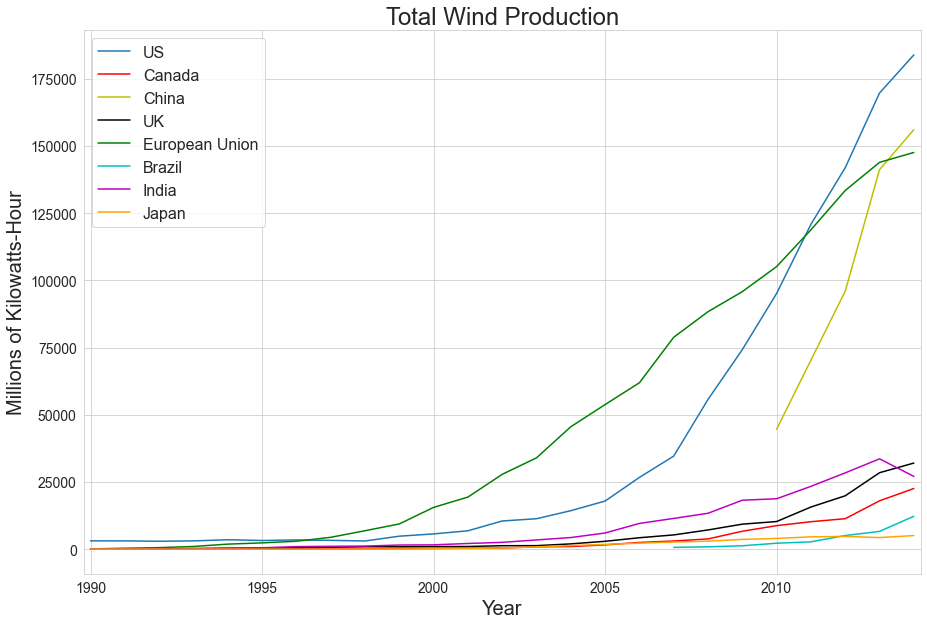

In [52]:

plt.figure(figsize=(15,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(x1,y1,label="US")
plt.plot(x2,y2,'r',label="Canada")
plt.plot(x3,y3,'y',label="China")
plt.plot(x4,y4,'k',label="UK")
plt.plot(x5,y5,'g',label="European Union")
plt.plot(x6,y6,'c',label="Brazil")
plt.plot(x7,y7,'m',label="India")
plt.plot(x8,y8,'orange',label="Japan")




plt.legend(fontsize=16)
plt.ylabel("Millions of Kilowatts-Hour",fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Total Wind Production',fontsize=24)
plt.xlim(1989.8, 2014.2)
plt.savefig('total_wind_production.png')
plt.show()


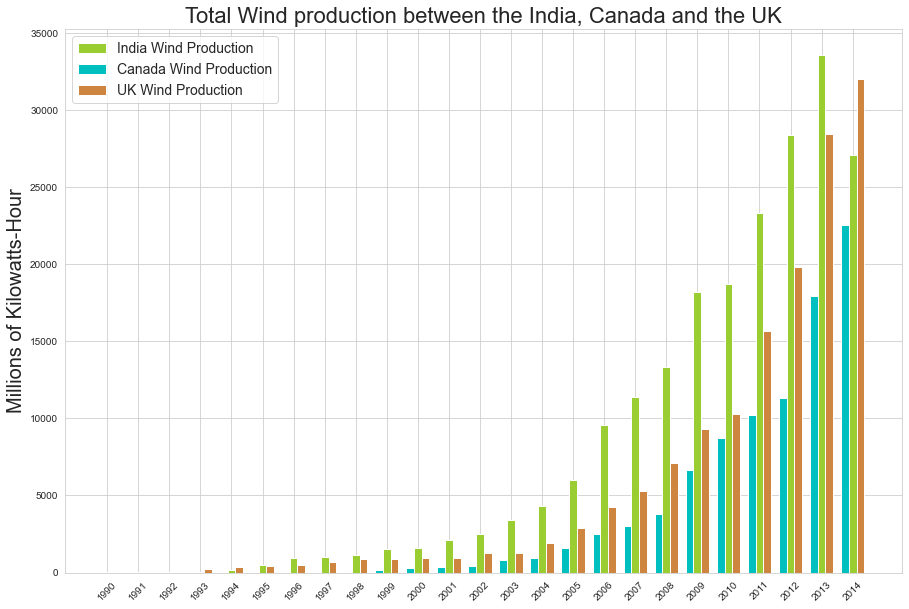

In [53]:

width = 0.25       # the width of the bars

fig, ax = plt.subplots(figsize=(15,10))
rects1 = ax.bar(IND_Wind["year"], IND_Wind["quantity"], width, color='yellowgreen')
rects2 = ax.bar(CAN_Wind["year"] + width -.5, CAN_Wind["quantity"], width, color='c')
rects3 = ax.bar(UK_Wind["year"] + width, UK_Wind["quantity"], width, color='peru')

ax.set_ylabel("Millions of Kilowatts-Hour", fontsize=20)
ax.set_title("Total Wind production between the India, Canada and the UK",fontsize=22)
ax.set_xticks(US_Wind["year"])
ax.set_xticklabels(US_Wind["year"], rotation=45)

ax.legend((rects1[0], rects2[0],rects3[0]), ('India Wind Production', 'Canada Wind Production',
                                             'UK Wind Production' ), fontsize=14)
plt.savefig('total_wind_production_in_can_uk.png')
plt.show()

C:\Users\91940\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91940\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


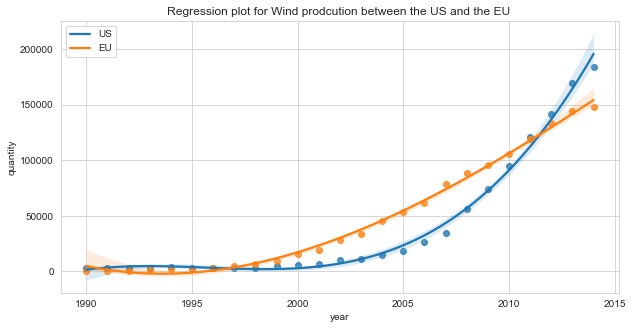

In [54]:
plt.figure(figsize=(10,5))
sns.regplot(x1,y1, order=3)
sns.regplot(x5,y5, order=3)
plt.legend(labels=["US", "EU"])
plt.title("Regression plot for Wind prodcution between the US and the EU ")
plt.savefig('reg_plot_us_eu.png')
plt.show()

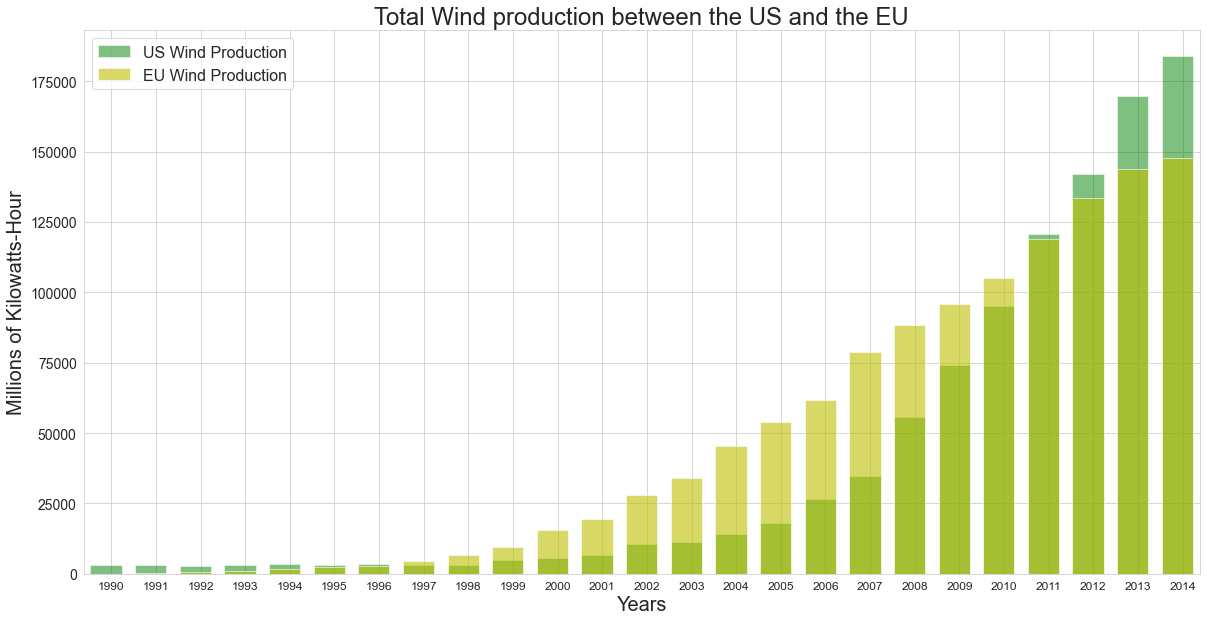

In [55]:
#Visualization of the energy production i US by Wind, Solar and Nuclear production


bar_width =.7
plt.figure(figsize=(20,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
x = np.arange(len(US_Wind["year"]))
plt.bar(x, US_Wind["quantity"],bar_width, color='g',capstyle= 'projecting', label="US Wind Production", alpha=.5)
plt.bar(x , EU_Wind["quantity"],bar_width, color='y', label="EU Wind Production", alpha=.6)


plt.legend(fontsize=16)
plt.xlabel("Years", fontsize=20)
plt.ylabel("Millions of Kilowatts-Hour", fontsize=20)
plt.title("Total Wind production between the US and the EU", fontsize=24)
plt.xticks(x + bar_width / 6, US_Wind["year"])
plt.xlim(-.5,24.5)
plt.savefig('total_wind_production_us_eu.png')
plt.show()

In this plot I show the difference between countries in the "European Union".  

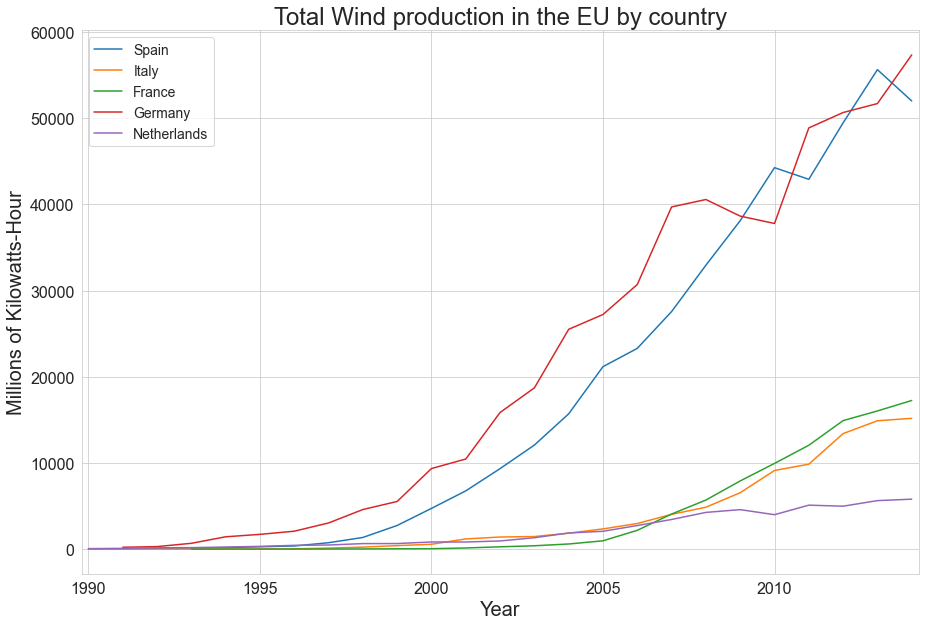

In [56]:


plt.figure(figsize=(15,10))
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.plot(SP_Wind["year"],SP_Wind["quantity"],label="Spain")
plt.plot(ITA_Wind["year"],ITA_Wind["quantity"],label="Italy")
plt.plot(FRA_Wind["year"],FRA_Wind["quantity"],label="France")
plt.plot(GER_Wind["year"],GER_Wind["quantity"],label="Germany")
plt.plot(NETH_Wind["year"],NETH_Wind["quantity"],label="Netherlands")



plt.legend(fontsize=14)
plt.ylabel("Millions of Kilowatts-Hour",fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Total Wind production in the EU by country',fontsize=24)
plt.xlim(1989.8, 2014.2)
plt.savefig('total_wind_production_eu_by_country.png')
plt.show()

**This section you can see the difference in Solar production between the selected group of countries**

In [57]:
#This is for the Solar Production
y1b = US_Solar.quantity
x1b = US_Solar.year
y2b = CAN_Solar.quantity
x2b = CAN_Solar.year
y3b = CHI_Solar.quantity
x3b = CHI_Solar.year
x4b = UK_Solar.year
y4b = UK_Solar.quantity
x5b = EU_Solar.year
y5b = EU_Solar.quantity
x6b = BR_Solar.year
y6b = BR_Solar.quantity
x7b = IND_Solar.year
y7b = IND_Solar.quantity
x8b = JAP_Solar.year
y8b = JAP_Solar.quantity


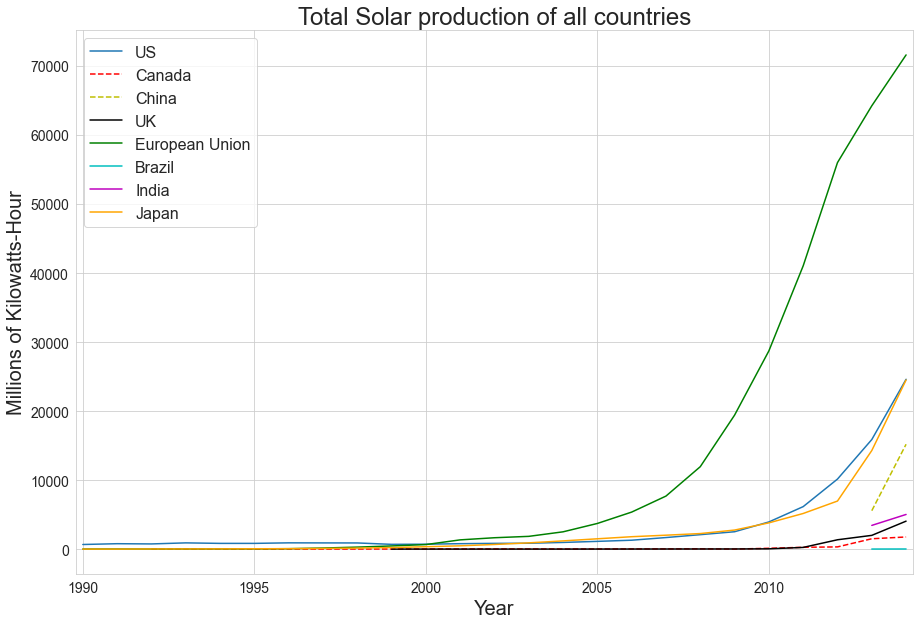

In [58]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(x1b,y1b,label="US")
plt.plot(x2b,y2b,'r--',label="Canada")
plt.plot(x3b,y3b,'y--',label="China")
plt.plot(x4b,y4b,'k',label="UK")
plt.plot(x5b,y5b,'g',label="European Union")
plt.plot(x6b,y6b,'c',label="Brazil")
plt.plot(x7b,y7b,'m',label="India")
plt.plot(x8b,y8b,'orange',label="Japan")




plt.legend(fontsize=16)
plt.ylabel("Millions of Kilowatts-Hour",fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Total Solar production of all countries',fontsize=24)
plt.xlim(1989.8, 2014.2)
plt.savefig('total_solar_production.png')
plt.show()

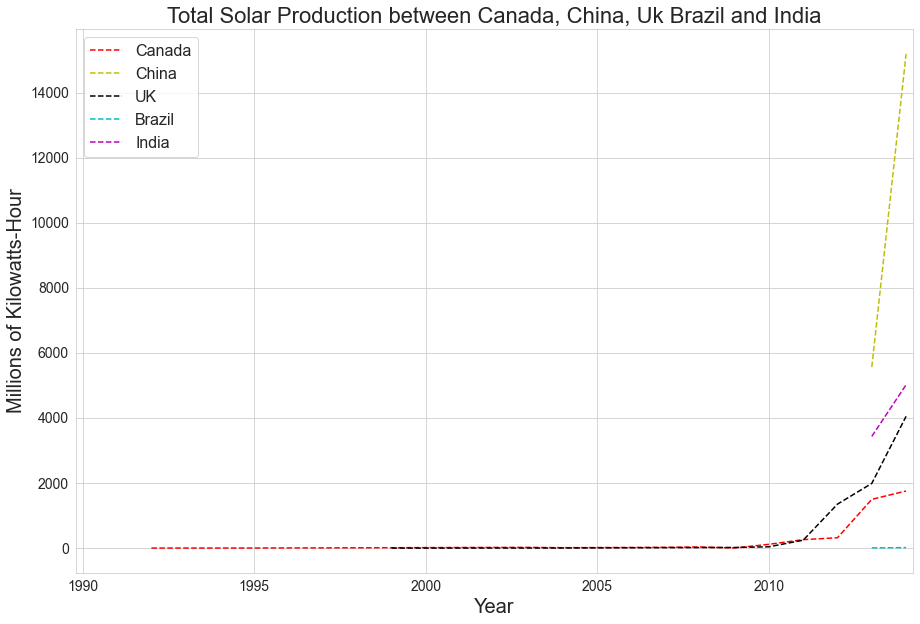

In [59]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.plot(x2b,y2b,'r--',label="Canada")
plt.plot(x3b,y3b,'y--',label="China")
plt.plot(x4b,y4b,'k--',label="UK")
plt.plot(x6b,y6b,'c--',label="Brazil")
plt.plot(x7b,y7b,'m--',label="India")

plt.legend(fontsize=16)
plt.ylabel("Millions of Kilowatts-Hour",fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Total Solar Production between Canada, China, Uk Brazil and India',fontsize=22)
plt.xlim(1989.8, 2014.2)
plt.savefig('total_solar_production_in_can_uk.png')
plt.show()

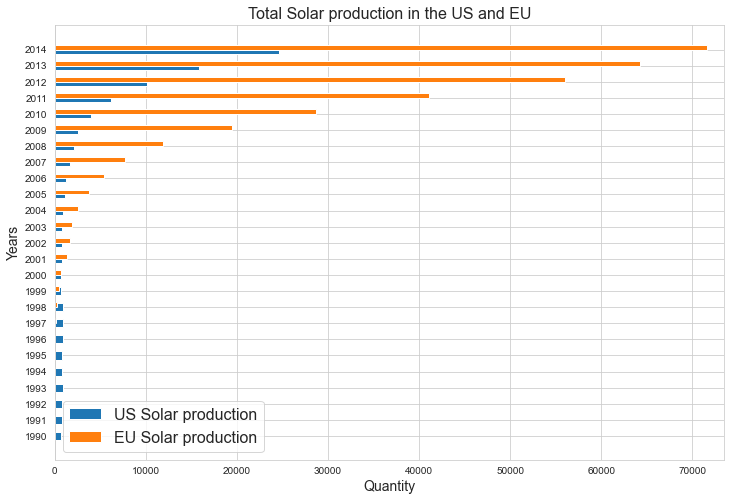

In [60]:
br= .5
plt.figure(figsize=(12,8))
plt.barh(US_Solar["year"],US_Solar["quantity"],height = br , label="US Solar production")
plt.barh(EU_Solar["year"] , EU_Solar["quantity"],align ='edge', height=br-.2, label="EU Solar production" )
plt.yticks(EU_Solar["year"])

plt.legend(fontsize=16)
plt.ylabel("Years", fontsize=14)
plt.xlabel("Quantity", fontsize=14)
plt.title("Total Solar production in the US and EU", fontsize=16)
plt.xlim(0, 73500)
plt.savefig('total_solar_production_us_eu.png')
plt.show()


In [61]:
#This is for the wind Production
y1c = US_Nuclear.quantity
x1c = US_Nuclear.year
y2c = CAN_Nuclear.quantity
x2c = CAN_Nuclear.year
y3c = CHI_Nuclear.quantity
x3c = CHI_Nuclear.year
x4c = UK_Nuclear.year
y4c = UK_Nuclear.quantity
x5c = EU_Nuclear.year
y5c = EU_Nuclear.quantity
x6c = BR_Nuclear.year
y6c = BR_Nuclear.quantity
x7c = IND_Nuclear.year
y7c = IND_Nuclear.quantity
x8c = JAP_Nuclear.year
y8c = JAP_Nuclear.quantity


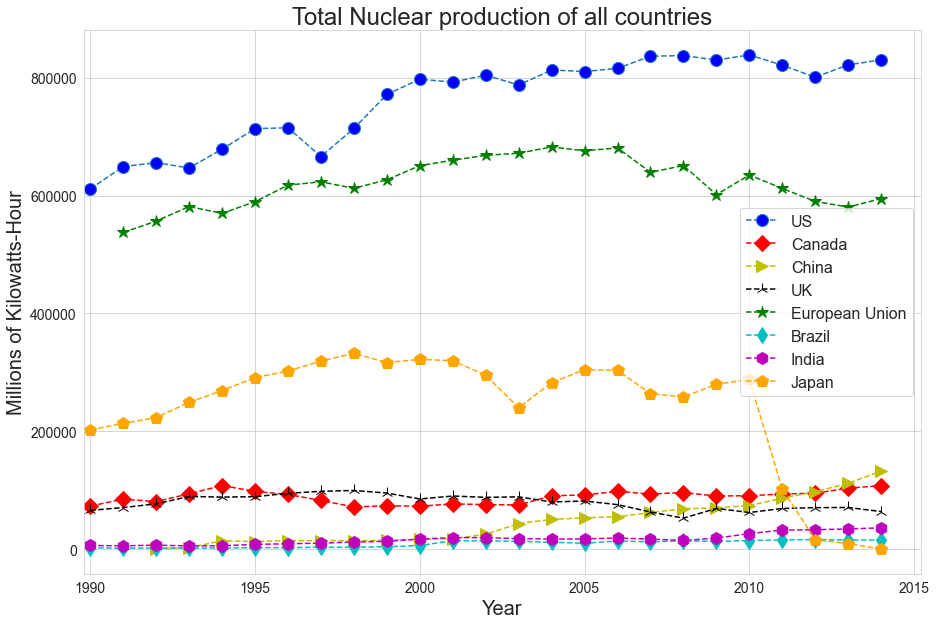

In [62]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(x1c,y1c,label="US", linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=12)
plt.plot(x2c,y2c,'r',linestyle='dashed', marker='D',
         markerfacecolor='r', markersize=12, label="Canada")
plt.plot(x3c,y3c,'y',linestyle='dashed', marker='>',
         markerfacecolor='y', markersize=12,label="China")
plt.plot(x4c,y4c,'k',linestyle='dashed', marker='2',
         markerfacecolor='k', markersize=12,label="UK")
plt.plot(x5c,y5c,'g',linestyle='dashed', marker='*',
         markerfacecolor='g', markersize=12,label="European Union")
plt.plot(x6c,y6c,'c',linestyle='dashed', marker='d',
         markerfacecolor='c', markersize=12,label="Brazil")
plt.plot(x7c,y7c,'m',linestyle='dashed', marker='h',
         markerfacecolor='m', markersize=12,label="India")
plt.plot(x8c,y8c,'orange',linestyle='dashed', marker='p',
         markerfacecolor='orange', markersize=12,label="Japan")




plt.legend(fontsize=16)
plt.ylabel("Millions of Kilowatts-Hour",fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Total Nuclear production of all countries',fontsize=24)
plt.xlim(1989.8, 2015.2)
plt.savefig('total_nuclear_production.png')
plt.show()

Here I would compare the Wind Solar and Nuclear production in each country

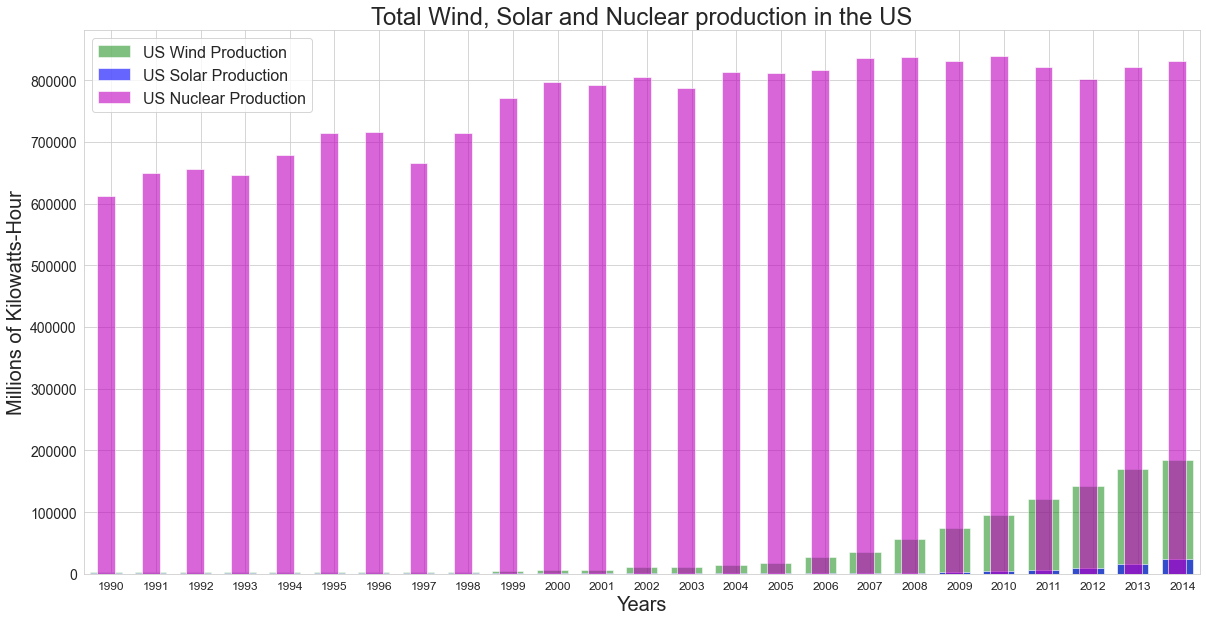

In [63]:
bar_width =.7
plt.figure(figsize=(20,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
x = np.arange(len(US_Wind["year"]))
plt.bar(x, US_Wind["quantity"],bar_width, color='g',capstyle= 'projecting', label="US Wind Production", alpha=.5)
plt.bar(x , US_Solar["quantity"],bar_width, color='b', label="US Solar Production", alpha=.6)
plt.bar(x , US_Nuclear["quantity"],bar_width - .3 , color='m', label="US Nuclear Production", alpha=.6)


plt.legend(fontsize=16)
plt.xlabel("Years", fontsize=20)
plt.ylabel("Millions of Kilowatts-Hour", fontsize=20)
plt.title("Total Wind, Solar and Nuclear production in the US", fontsize=24)
plt.xticks(x + bar_width / 6, US_Wind["year"])
plt.xlim(-.5,24.5)
plt.savefig('total_wind_solar_nuclear_production_us.png')
plt.show()

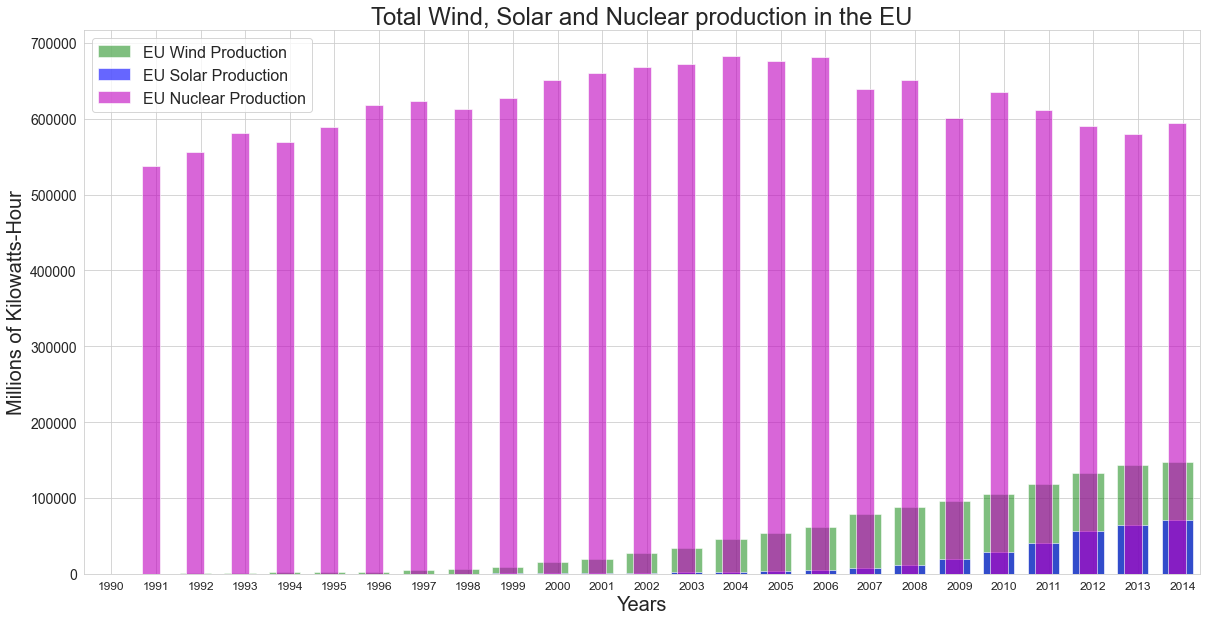

In [64]:
bar_width =.7
plt.figure(figsize=(20,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
x = np.arange(len(EU_Wind["year"]))
plt.bar(x, EU_Wind["quantity"],bar_width, color='g',capstyle= 'projecting', label="EU Wind Production", alpha=.5)
plt.bar(x , EU_Solar["quantity"],bar_width, color='b', label="EU Solar Production", alpha=.6)
plt.bar(x , EU_Nuclear["quantity"],bar_width - .3 , color='m', label="EU Nuclear Production", alpha=.6)


plt.legend(fontsize=16)
plt.xlabel("Years", fontsize=20)
plt.ylabel("Millions of Kilowatts-Hour", fontsize=20)
plt.title("Total Wind, Solar and Nuclear production in the EU", fontsize=24)
plt.xticks(x + bar_width / 6, US_Wind["year"])
plt.xlim(-.5,24.5)
plt.savefig('total_wind_solar_nuclear_production_eu.png')
plt.show()

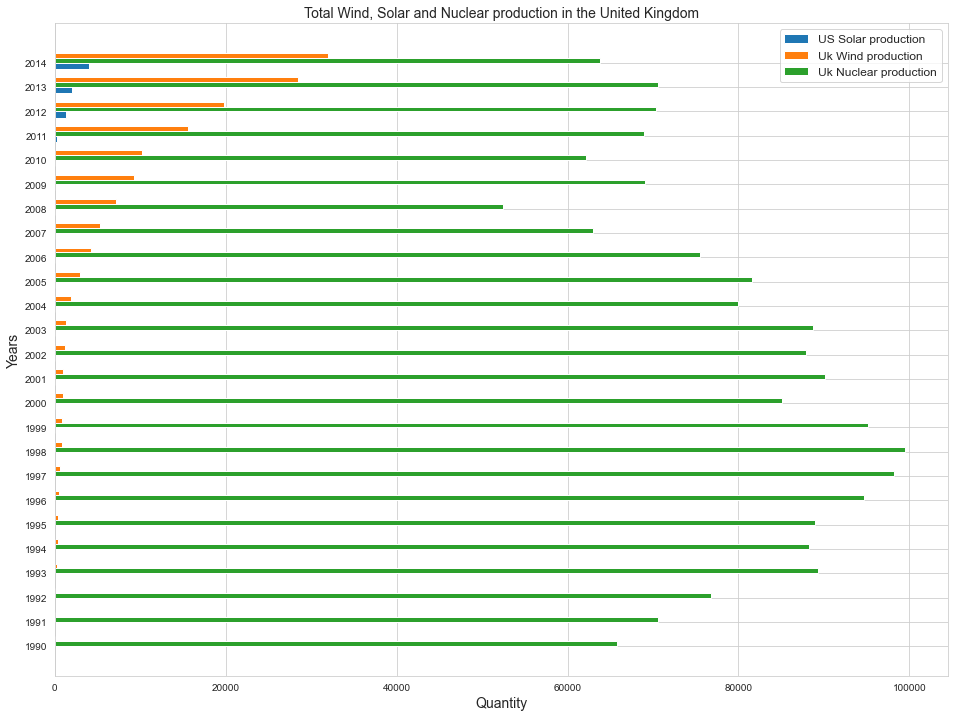

In [65]:
br= .5
plt.figure(figsize=(16,12))
plt.barh(UK_Solar["year"],UK_Solar["quantity"],height = br , label="US Solar production")
plt.barh(UK_Wind["year"] , UK_Wind["quantity"],align ='edge', height=br-.1, label="Uk Wind production" )
plt.barh(UK_Nuclear["year"] , UK_Nuclear["quantity"],align ='edge', height=br-.3, label="Uk Nuclear production" )
plt.yticks(EU_Solar["year"])

plt.legend(fontsize=12)
plt.ylabel("Years", fontsize=14)
plt.xlabel("Quantity", fontsize=14)
plt.title("Total Wind, Solar and Nuclear production in the United Kingdom", fontsize=14)
plt.xlim()
plt.savefig('total_wind_solar_nuclear_production_uk.png')
plt.show()

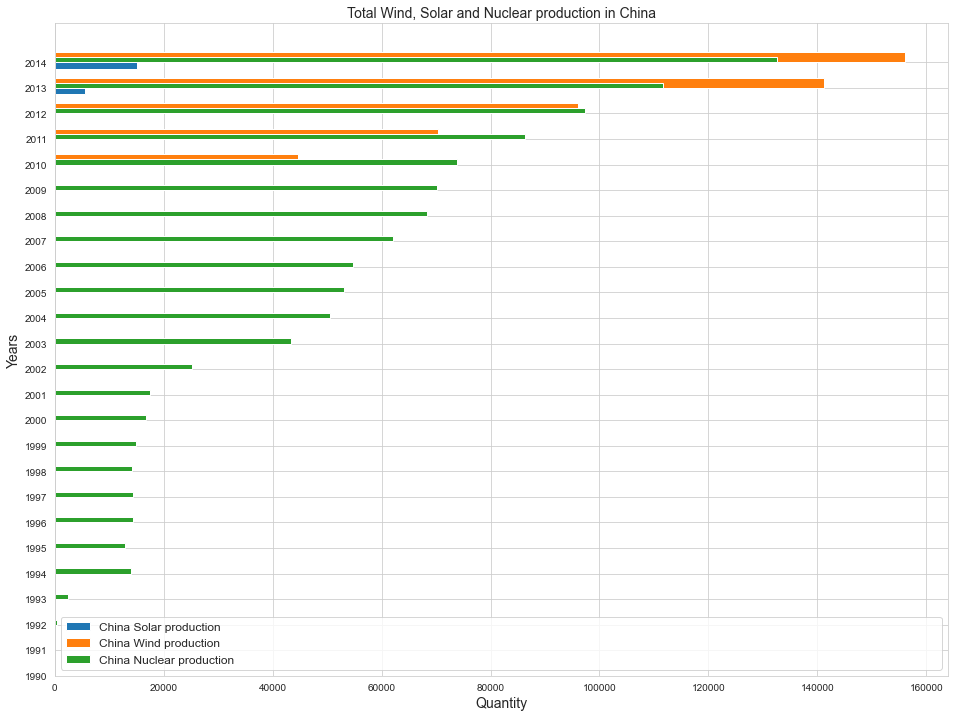

In [66]:
br= .5
plt.figure(figsize=(16,12))
plt.barh(CHI_Solar["year"],CHI_Solar["quantity"],height = br , label="China Solar production")
plt.barh(CHI_Wind["year"] , CHI_Wind["quantity"],align ='edge', height=br-.1, label="China Wind production" )
plt.barh(CHI_Nuclear["year"] , CHI_Nuclear["quantity"],align ='edge', height=br-.3, label="China Nuclear production" )
plt.yticks(EU_Solar["year"])

plt.legend(mode = "expand",fontsize=12)
plt.ylabel("Years", fontsize=14)
plt.xlabel("Quantity", fontsize=14)
plt.title("Total Wind, Solar and Nuclear production in China", fontsize=14)
plt.xlim()
plt.savefig('total_wind_solar_nuclear_production_china.png')
plt.show()

This is the end of the visualization feel free to use the code and expand on it. 


